# Get the benchmark for retinal ganglion cell precision

In [77]:
from __future__ import print_function
import tableprint
import numpy as np
import h5py
from deepretina.modeltools import cc, fev, lli
from scipy.stats import pearsonr
from math import isnan
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Whitenoise

In [2]:
filename = '/Users/lmcintosh/experiments/data/15-10-07/whitenoise.h5'
f = h5py.File(filename, 'r')
list(f)

[u'spikes', u'test', u'train']

In [3]:
all_repeats = f['test/repeats']

In [4]:
num_repeats = 6
num_cells = 9

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

In [7]:
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs, axis=0)))
print(tableprint.row(np.mean(ccs, axis=0)))
print(tableprint.row(np.mean(fevs, axis=0)))
print(tableprint.row(np.mean(llis, axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.82179 |    0.59263 |    0.51395 |    0.84968 |    0.67737 |    0.58897 |    0.35028 |     0.3574 |   0.012609|
|   0.82179 |    0.59263 |    0.51395 |    0.84968 |    0.67737 |    0.58897 |    0.35028 |     0.3574 |   0.012609|
|   0.55903 |   -0.23348 |   -0.67488 |    0.64526 |   0.055597 |   -0.26886 |    -1.5741 |    -1.6394 |    -5.3845|
|    6.5662 |     6.5931 |     23.515 |     8.6988 |     15.686 |     7.1085 |    -5.7121 |    -10.069 |    -10.139|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


#### Across cells 0 to 4 (first five cells)

In [12]:
print(tableprint.hr(3))
print(tableprint.header(['correlation', 'f.e.v.', 'l.l.i.']))
print(tableprint.hr(3))
print(tableprint.row([np.mean(pearsonrs[:,:5]), np.mean(fevs[:,:5]), np.mean(llis[:,:5])]))
print(tableprint.hr(3))

+-----------+------------+-----------+
|correlation | f.e.v.     | l.l.i.    |
+-----------+------------+-----------+
|   0.69108 |   0.070303 |     12.212|
+-----------+------------+-----------+


In [13]:
f.close()

# Natural scenes

In [15]:
filename = '/Users/lmcintosh/experiments/data/15-10-07/naturalscene.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [17]:
num_repeats = 6
num_cells = 9

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs, axis=0)))
print(tableprint.row(np.mean(ccs, axis=0)))
print(tableprint.row(np.mean(fevs, axis=0)))
print(tableprint.row(np.mean(llis, axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.64975 |     0.4166 |     0.3958 |    0.66056 |    0.62141 |    0.50569 |    0.39033 |    0.34272 |  -0.015435|
|   0.64975 |     0.4166 |     0.3958 |    0.66056 |    0.62141 |    0.50569 |    0.39033 |    0.34272 |  -0.015435|
|   0.37654 |   -0.45578 |   -0.57656 |    0.41076 |    0.29812 |   -0.10092 |   -0.58713 |   -0.83546 |    -4.0507|
|    8.9547 |     2.7442 |     3.7002 |     12.163 |     18.548 |     4.8342 |   -0.90738 |    -7.7262 |    -7.8972|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


#### Across first five cells

In [18]:
print(tableprint.hr(3))
print(tableprint.header(['correlation', 'f.e.v.', 'l.l.i.']))
print(tableprint.hr(3))
print(tableprint.row([np.mean(pearsonrs[:,:5]), np.mean(fevs[:,:5]), np.mean(llis[:,:5])]))
print(tableprint.hr(3))

+-----------+------------+-----------+
|correlation | f.e.v.     | l.l.i.    |
+-----------+------------+-----------+
|   0.54882 |   0.010614 |     9.2219|
+-----------+------------+-----------+


In [19]:
f.close()

# Structured stimuli

In [47]:
filename = '/Users/lmcintosh/experiments/data/16-01-07/structured.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [48]:
num_repeats = 3
num_cells = 33

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.72879 |    0.49239 |    0.43043 |   0.013919 |   0.084205 |    0.11707 |    0.24442 |    0.50037 |    0.66739|
|   0.72879 |    0.49239 |    0.43043 |   0.013919 |   0.084205 |    0.11707 |    0.24442 |    0.50037 |    0.66739|
|   0.38646 |   -0.24777 |   -0.44839 |    -1.9425 |    -1.6905 |    -1.5702 |    -1.1436 |   -0.33145 |    0.24141|
|     8.257 |    -69.072 |    -2.1248 |    -33.928 |    -62.165 |    -25.032 |    -91.812 |    -7.4598 |     8.5147|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

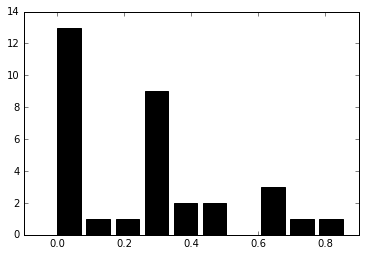

In [56]:
counts, bins = np.histogram(np.nanmean(pearsonrs, axis=0))
plt.bar(bins[:-1], counts, width=0.07, color='k')

In [46]:
f.close()

In [87]:
filename = '/Users/lmcintosh/experiments/data/16-01-08/structured.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [88]:
num_repeats = 3
num_cells = 14

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|    0.6551 |    0.17254 |    0.29339 |    0.58913 |        nan |    0.22524 |   0.098713 |        nan |    0.22317|
|    0.6551 |    0.17254 |    0.29339 |    0.58913 |        nan |    0.22524 |   0.098713 |        nan |    0.22317|
|   0.20148 |    -1.3782 |    -0.9509 |  -0.060762 |    -2.6688 |    -2.0744 |    -2.1229 |    -1.4669 |    -1.2985|
|   -3.1931 |    -29.701 |    -21.036 |    -4.8229 |        nan |    -83.806 |    -86.464 |        nan |    -17.696|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

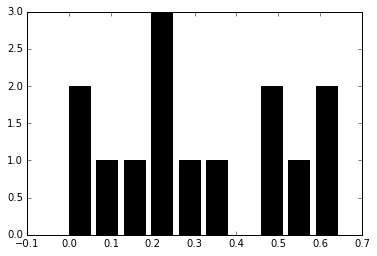

In [89]:
mean_cc = np.nanmean(pearsonrs, axis=0)
avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
counts, bins = np.histogram(mean_cc[avoid_nans])
plt.bar(bins[:-1], counts, width=.05, color='k')

# Natural movie

In [27]:
filename = '/Users/lmcintosh/experiments/data/16-01-07/naturalmovie.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [28]:
num_repeats = 3
num_cells = 33

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|   0.64431 |    0.63779 |    0.37948 | -0.0029353 | -0.0019541 |    0.27431 |    0.40143 |    0.48189 |    0.40408|
|   0.64431 |    0.63779 |    0.37948 | -0.0029353 | -0.0019541 |    0.27431 |    0.40143 |    0.48189 |    0.40408|
|   0.13911 |   0.061803 |   -0.63463 |    -2.0613 |    -2.2045 |   -0.97492 |    -0.6544 |   -0.77887 |   -0.55454|
|   -14.354 |      -6.84 |    -15.346 |     -46.73 |    -70.223 |    -40.103 |    -124.91 |     151.72 |    -467.37|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

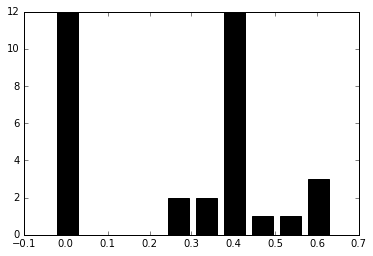

In [38]:
counts, bins = np.histogram(np.mean(pearsonrs, axis=0))
plt.bar(bins[:-1], counts, width=.05, color='k')

In [57]:
f.close()

In [58]:
filename = '/Users/lmcintosh/experiments/data/16-01-08/naturalmovie.h5'
f = h5py.File(filename, 'r')
all_repeats = f['test/repeats']

In [59]:
num_repeats = 3
num_cells = 14

pearsonrs = np.zeros((num_repeats, num_cells)) # pearson r
ccs = np.zeros((num_repeats, num_cells)) # correlation coefficient via numpy
fevs = np.zeros((num_repeats, num_cells)) # fraction variance explained
llis = np.zeros((num_repeats, num_cells)) # log likelihood improvement

for cell_idx, key in enumerate(list(all_repeats)):
    repeats = f['test/repeats/' + key]
    for rep in range(repeats.shape[0]):
        other_repeats = [i for i in range(repeats.shape[0]) if i != rep]
        average_other_repeat = np.mean(repeats[other_repeats], axis=0)
        pearsonrs[rep, cell_idx] = pearsonr(average_other_repeat, repeats[rep])[0]
        ccs[rep, cell_idx] = cc(average_other_repeat, repeats[rep])
        fevs[rep, cell_idx] = fev(average_other_repeat, repeats[rep])
        llis[rep, cell_idx] = lli(np.array(average_other_repeat), repeats[rep])

# just look at first 9 cells
print(tableprint.hr(9))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4', 'cell 5', 'cell 6', 'cell 7', 'cell 8']))
print(tableprint.hr(9))
print(tableprint.row(np.mean(pearsonrs[:,:9], axis=0)))
print(tableprint.row(np.mean(ccs[:,:9], axis=0)))
print(tableprint.row(np.mean(fevs[:,:9], axis=0)))
print(tableprint.row(np.mean(llis[:,:9], axis=0)))
print(tableprint.hr(9))

+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4     | cell 5     | cell 6     | cell 7     | cell 8    |
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+
|    0.7853 |    0.34393 |    0.37864 |     0.7012 |        nan |   0.092987 |    0.10988 |        nan |    0.37406|
|    0.7853 |    0.34393 |    0.37864 |     0.7012 |        nan |   0.092987 |    0.10988 |        nan |    0.37406|
|    0.3865 |   -0.99419 |   -0.74028 |   0.082993 |        nan |    -2.3629 |    -3.3756 |    -18.766 |    -1.0254|
|    2.7893 |    -34.465 |    -23.098 |    -6.4358 |        nan |    -3549.5 |    -123.17 |        nan |    -33.062|
+-----------+------------+------------+------------+------------+------------+------------+------------+-----------+


<Container object of 10 artists>

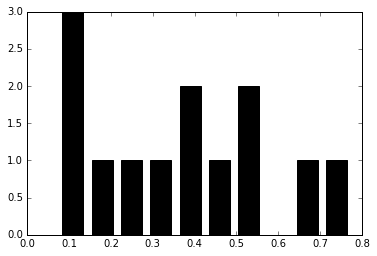

In [86]:
mean_cc = np.nanmean(pearsonrs, axis=0)
avoid_nans = [i for i in range(len(mean_cc)) if not isnan(mean_cc[i])]
counts, bins = np.histogram(mean_cc[avoid_nans])
plt.bar(bins[:-1], counts, width=.05, color='k')